GAN with feature-matching generator loss function.

In [1]:
using PyPlot, JLD, AnomalyDetection, EvalCurves
import PyPlot: plot
include("./plots.jl")

PyPlot.plot

In [2]:
# load data
dataset = load("toy_data_3.jld")["data"]
X = AnomalyDetection.Float.(dataset.data)
Y = dataset.labels
nX = X[:, Y.==0]
M, N = size(X)

(2, 103)

In [3]:
# GAN settings
zdim = 1 # code dimension
xdim = M # dimension of data
hiddendim = 32  

# setup the GAN model object
gsize = [zdim; hiddendim; hiddendim; xdim] # generator layout
dsize = [xdim; hiddendim*2; hiddendim*2; 1] # discriminator layout
lambda = 0.5 # anomaly score parameter in [0, 1]
# 1 - ignores the discriminator score
# 0- ignores the reconstruction error score
threshold = 0 # classification threshold, is recomputed (getthreshold or when using fit!)
contamination = size(Y[Y.==1],1)/size(Y, 1) # contamination ratio
batchsize = 50 # batchsize
iterations = 10000 # no of iterations
cbit = 2500 # when should output be printed
nepochs = Int(ceil(batchsize*iterations/size(nX,2))) # if this is supplied, do epoch training
verbfit = true # if output should be produced
pz = randn # code distribution (rand should also work)
activation = Flux.leakyrelu # should work better than relu
layer = Flux.Dense
rdelta = 1e-5 # stop training after this reconstruction error is achieved
# this parameter is basically useless in the case of GANs
alpha = 1e-1 # weight of the classical generator loss in the total loss
# used to train generator
Beta = 1.0 # for automatic threshold computation, in [0, 1] 
# 1.0 = tight around normal samples
tracked = true # do you want to store training progress?
# it can be later retrieved from model.traindata
eta = 0.001
model = fmGANmodel(gsize, dsize; lambda=lambda, threshold=threshold, 
    contamination=contamination, batchsize=batchsize, iterations=iterations, 
    cbit=cbit, nepochs = nepochs, verbfit=verbfit, 
    pz = pz, activation = activation, rdelta = rdelta, alpha = alpha,
    Beta = Beta, tracked = tracked, layer = layer, eta = eta)

AnomalyDetection.fmGANmodel(AnomalyDetection.fmGAN(Chain(Dense(1, 32, NNlib.leakyrelu), Dense(32, 32, NNlib.leakyrelu), Dense(32, 2)), Chain(Dense(1, 32, NNlib.leakyrelu), Dense(32, 32, NNlib.leakyrelu), Dense(32, 2)), Chain(Dense(2, 64, NNlib.leakyrelu), Dense(64, 64, NNlib.leakyrelu), Dense(64, 1, NNlib.σ)), Chain(Dense(2, 64, NNlib.leakyrelu), Dense(64, 64, NNlib.leakyrelu), Dense(64, 1, NNlib.σ)), Chain(Dense(2, 64, NNlib.leakyrelu), Dense(64, 64, NNlib.leakyrelu)), randn), 0.5, 0, 0.1262135922330097, 50, 10000, 2500, 5556, true, 1.0e-5, 0.1, 1.0, MVHistory{ValueHistories.History}, 0.001)

In [4]:
# fit the model
Z = AnomalyDetection.getcode(model, size(nX, 2))
AnomalyDetection.evalloss(model, nX, Z)
AnomalyDetection.fit!(model, nX)
AnomalyDetection.evalloss(model, nX, Z)

discriminator loss: 0.65544116
feature-matching loss: 0.004011209
reconstruction error: 0.465225



Progress:   0%|                                         |  ETA: 12:55:55
  discriminator loss:     0.65003777
  feature-matching loss:  0.0038937298
Progress:   1%|                                         |  ETA: 0:15:18
  discriminator loss:     0.6694324
  feature-matching loss:  0.004140311
Progress:   1%|                                         |  ETA: 0:10:20
  discriminator loss:     0.6846136
  feature-matching loss:  0.0029792725
Progress:   1%|                                         |  ETA: 0:08:03
  discriminator loss:     0.69128644
  feature-matching loss:  0.0055433353
Progress:   2%|█                                        |  ETA: 0:06:42
  discriminator loss:     0.6886797
  feature-matching loss:  0.003520339
Progress:   2%|█                                        |  ETA: 0:05:47
  discriminator loss:     0.6684004
  feature-matching loss:  0.0023058688
Progress:   2%|█                                        |  ETA: 0:05:08
  discriminator loss:     0.6891469
  feature

Progress:  14%|██████                                   |  ETA: 0:01:52
  discriminator loss:     0.72199523
  feature-matching loss:  0.0070408536
Progress:  15%|██████                                   |  ETA: 0:01:51
  discriminator loss:     0.6869987
  feature-matching loss:  0.0061027985
Progress:  15%|██████                                   |  ETA: 0:01:50
  discriminator loss:     0.7150912
  feature-matching loss:  0.004909359
Progress:  15%|██████                                   |  ETA: 0:01:49
  discriminator loss:     0.65797985
  feature-matching loss:  0.008181524
Progress:  16%|██████                                   |  ETA: 0:01:48
  discriminator loss:     0.6945375
  feature-matching loss:  0.0059571457
Progress:  16%|███████                                  |  ETA: 0:01:47
  discriminator loss:     0.6853276
  feature-matching loss:  0.009242422
Progress:  16%|███████                                  |  ETA: 0:01:46
  discriminator loss:     0.6864096
  feature-m

Progress:  29%|████████████                             |  ETA: 0:01:20
  discriminator loss:     0.6930245
  feature-matching loss:  0.008704593
Progress:  29%|████████████                             |  ETA: 0:01:19
  discriminator loss:     0.70221555
  feature-matching loss:  0.006320223
Progress:  30%|████████████                             |  ETA: 0:01:18
  discriminator loss:     0.68199694
  feature-matching loss:  0.0067588584
Progress:  30%|████████████                             |  ETA: 0:01:17
  discriminator loss:     0.6958154
  feature-matching loss:  0.007475716
Progress:  31%|█████████████                            |  ETA: 0:01:17
  discriminator loss:     0.6845216
  feature-matching loss:  0.007906215
Progress:  31%|█████████████                            |  ETA: 0:01:16
  discriminator loss:     0.70342124
  feature-matching loss:  0.010152002
Progress:  31%|█████████████                            |  ETA: 0:01:16
  discriminator loss:     0.6832824
  feature-ma

Progress:  44%|██████████████████                       |  ETA: 0:00:58
  discriminator loss:     0.69466734
  feature-matching loss:  0.0094704805
Progress:  45%|██████████████████                       |  ETA: 0:00:58
  discriminator loss:     0.6867527
  feature-matching loss:  0.011063723
Progress:  45%|██████████████████                       |  ETA: 0:00:58
  discriminator loss:     0.7057032
  feature-matching loss:  0.011572532
Progress:  45%|███████████████████                      |  ETA: 0:00:57
  discriminator loss:     0.70229673
  feature-matching loss:  0.010315094
Progress:  46%|███████████████████                      |  ETA: 0:00:57
  discriminator loss:     0.6824764
  feature-matching loss:  0.0117022395
Progress:  46%|███████████████████                      |  ETA: 0:00:57
  discriminator loss:     0.67678607
  feature-matching loss:  0.00965522
Progress:  46%|███████████████████                      |  ETA: 0:00:56
  discriminator loss:     0.6960702
  feature-ma

Progress:  58%|████████████████████████                 |  ETA: 0:00:43
  discriminator loss:     0.6676676
  feature-matching loss:  0.013166303
Progress:  59%|████████████████████████                 |  ETA: 0:00:43
  discriminator loss:     0.68543315
  feature-matching loss:  0.008635733
Progress:  59%|████████████████████████                 |  ETA: 0:00:42
  discriminator loss:     0.69918036
  feature-matching loss:  0.009426253
Progress:  59%|████████████████████████                 |  ETA: 0:00:42
  discriminator loss:     0.6912029
  feature-matching loss:  0.011660647
Progress:  60%|████████████████████████                 |  ETA: 0:00:42
  discriminator loss:     0.67186916
  feature-matching loss:  0.009573266
Progress:  60%|█████████████████████████                |  ETA: 0:00:41
  discriminator loss:     0.6950873
  feature-matching loss:  0.0053454777
Progress:  60%|█████████████████████████                |  ETA: 0:00:41
  discriminator loss:     0.6936259
  feature-ma

Progress:  72%|██████████████████████████████           |  ETA: 0:00:28
  discriminator loss:     0.68887925
  feature-matching loss:  0.009413325
Progress:  73%|██████████████████████████████           |  ETA: 0:00:28
  discriminator loss:     0.7059859
  feature-matching loss:  0.009039427
Progress:  73%|██████████████████████████████           |  ETA: 0:00:28
  discriminator loss:     0.68581223
  feature-matching loss:  0.007125961
Progress:  73%|██████████████████████████████           |  ETA: 0:00:27
  discriminator loss:     0.70369357
  feature-matching loss:  0.01165943
Progress:  74%|██████████████████████████████           |  ETA: 0:00:27
  discriminator loss:     0.66893375
  feature-matching loss:  0.006109369
Progress:  74%|██████████████████████████████           |  ETA: 0:00:27
  discriminator loss:     0.7123629
  feature-matching loss:  0.008564664
Progress:  74%|██████████████████████████████           |  ETA: 0:00:26
  discriminator loss:     0.7155963
  feature-mat

Progress:  86%|███████████████████████████████████      |  ETA: 0:00:14
  discriminator loss:     0.6855339
  feature-matching loss:  0.007798736
Progress:  87%|████████████████████████████████████     |  ETA: 0:00:14
  discriminator loss:     0.68017256
  feature-matching loss:  0.009107064
Progress:  87%|████████████████████████████████████     |  ETA: 0:00:13
  discriminator loss:     0.6942484
  feature-matching loss:  0.006377209
Progress:  87%|████████████████████████████████████     |  ETA: 0:00:13
  discriminator loss:     0.6894372
  feature-matching loss:  0.010208962
Progress:  88%|████████████████████████████████████     |  ETA: 0:00:13
  discriminator loss:     0.7012063
  feature-matching loss:  0.006968522
Progress:  88%|████████████████████████████████████     |  ETA: 0:00:12
  discriminator loss:     0.6881479
  feature-matching loss:  0.006885039
Progress:  88%|████████████████████████████████████     |  ETA: 0:00:12
  discriminator loss:     0.6981172
  feature-match

discriminator loss: 0.694783
feature-matching loss: 0.009848105
reconstruction error: 0.14939606



Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
  discriminator loss:     0.6947501
  feature-matching loss:  0.009718126
  reconstruction error:   0.15852176


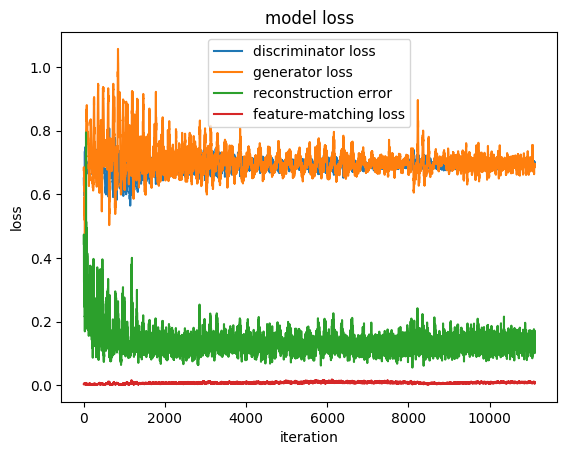

In [5]:
# plot model loss
plot(model)
show()

In [6]:
# generate new data
xgen = AnomalyDetection.generate(model, N)

2×103 Array{Float32,2}:
 0.553975  0.774749  0.830074  0.834893  …  0.0772261  0.0591228  0.693603
 0.5543    0.761753  0.810342  0.820452     1.06685    1.05358    0.68641 

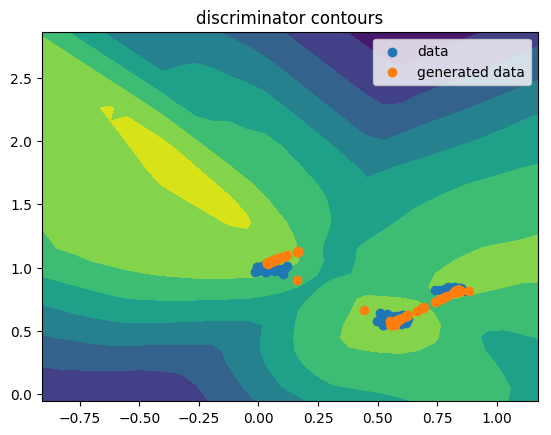

In [7]:
# plot them
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)


x = linspace(xl[1], xl[2], 30)
y = linspace(yl[1], yl[2], 30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        zz[i,j] = AnomalyDetection.discriminate(model, AnomalyDetection.Float.([x[j], y[i]]))[1]
    end
end

figure()
contourf(x, y, zz)
scatter(nX[1,:], nX[2,:], label = "data")
scatter(xgen[1,:], xgen[2,:], label = "generated data")
title("discriminator contours")
xlim(xl)
ylim(yl)
legend()
show()

Classification is based on anomaly score computed as a weighted average of reconstruction error and discriminator score
\begin{equation}
A(x) = (1-\lambda)D(x)+\lambda||x-G(z)||_{2, z \sim p(z)}
\end{equation}

In [8]:
# predict labels
AnomalyDetection.setthreshold!(model, X)
tryhat = AnomalyDetection.predict(model, X)

103-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 0
 0

In [9]:
# get all the labels
model.lambda = 0.1
AnomalyDetection.setthreshold!(model, X)
tryhat, tstyhat, _, _ = AnomalyDetection.rocstats(dataset, dataset, model);


 Training data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 11
  tn = 86
  fp = 4
  fn = 2
precision: 0.7333333333333333
f1score: 0.7857142857142857
recall: 0.8461538461538461
false positive rate: 0.044444444444444446
equal error rate: 0.09914529914529915

 Testing data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 10
  tn = 86
  fp = 4
  fn = 3
precision: 0.7142857142857143
f1score: 0.7407407407407407
recall: 0.7692307692307693
false positive rate: 0.044444444444444446
equal error rate: 0.13760683760683762


In [10]:
# anomaly score contour plot
# get limits of the figure
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)

# compute the anomaly score on a grid
x = linspace(xl[1], xl[2], 30)
y = linspace(yl[1], yl[2], 30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        zz[i,j] = AnomalyDetection.anomalyscore(model, AnomalyDetection.Float.([x[j], y[i]]))
    end
end

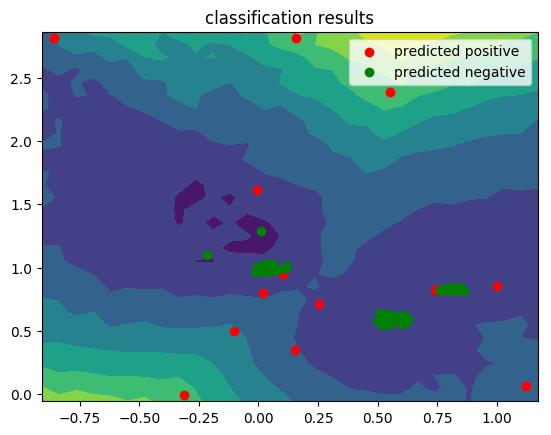

In [11]:
# plot it all
f = figure()
contourf(x, y, zz)
scatter(X[1, tryhat.==1], X[2, tryhat.==1], c = "r", 
    label = "predicted positive")
scatter(X[1, tryhat.==0], X[2, tryhat.==0], c = "g", 
    label = "predicted negative")
title("classification results")
xlim(xl)
ylim(yl)
legend()
show()

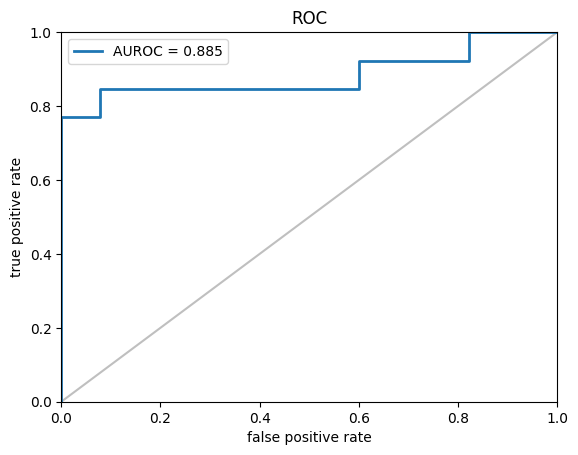

In [12]:
# plot ROC curve and compute AUROC score
ascore = AnomalyDetection.anomalyscore(model, X);
fprvec, tprvec = EvalCurves.roccurve(ascore, Y)
auroc = round(EvalCurves.auc(fprvec, tprvec),3)
EvalCurves.plotroc((fprvec, tprvec, "AUROC = $(auroc)"))
show()

In [13]:
# plot EER for different settings of lambda
using MLBase: roc, correctrate, precision, recall, f1score, false_positive_rate, false_negative_rate
n = 21
lvec = linspace(0,1,n)
eervec = zeros(n)
for i in 1:n
    model.lambda = lvec[i]
    AnomalyDetection.setthreshold!(model, X)
    tryhat, tsthat, trroc, tstroc = AnomalyDetection.rocstats(dataset.data, dataset.labels,
        dataset.data, dataset.labels, model, verb = false)
    eervec[i] = (false_positive_rate(tstroc) + false_negative_rate(tstroc))/2
end

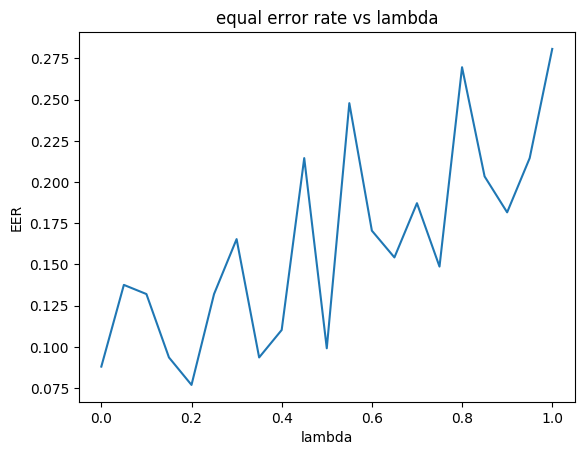

In [14]:
f = figure()
plot(lvec, eervec)
title("equal error rate vs lambda")
xlabel("lambda")
ylabel("EER")
show()